# KNN


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [145]:
from sklearn.datasets import make_blobs

In [146]:
X , Y = make_blobs(n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=5,)

In [147]:
int(X.shape[0]*0.8)

400

In [148]:
split = int(X.shape[0]*0.8)
X_train = X[:split]
y_train = Y[:split]
X_test = X[split:]
y_test = Y[split:]

In [149]:
X_train.shape

(400, 2)

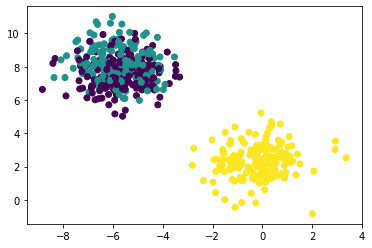

In [150]:
plt.scatter(X_train[: , 0] , X_train[: , 1] , c = y_train)
plt.scatter(X_test[: , 0] , X_test[: , 1] , c = y_test)

In [151]:
def distance(x1 , x2):
    return np.sqrt(sum((x1-x2)**2))

In [152]:
def knn(X_train , y_train ,  point , k=20):
    calculation = []
    size = X_train.shape[0]
    for i in range(size):
        dist = distance(X_train[i] , point)
        calculation.append((dist , y_train[i]))
    
    arranged_calc = sorted(calculation)
    top = arranged_calc[:k]
    np_top = np.array(top)
    type , occ = np.unique(np_top[: , 1] , return_counts=True)
    index = np.argmax(occ)
    return type[index]

In [153]:
def score(X_test , y_test):
    size = X_test.shape[0]
    predictions = []
    for i in range(size):
        pred = knn(X_train , y_train ,  X_test[i] , k=10)
        if y_test[i] == pred:
            predictions.append(1)
        else:
            predictions.append(0)
    s = sum(predictions)
    return (s/size)*100

In [154]:
knn(X_train , y_train , X_test[4] , k=10)

2.0

In [155]:
score(X_test , y_test)

71.0